# Resultados do Trabalho 2 de IA - Aprendizado por Reforço
**Aluno:** Filipe Gomes Arante de Souza\
**Matrícula:** 2020100625


# Bibliotecas utilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel, wilcoxon

# Iterações vs Pontuação
Eixo x: iteração da execução do PSO;
Eixo y (Linha laranja): Melhor pontuação obtida pela geração;
Eixo y (Linha azul): Pontuação média do enxame;

<Axes: xlabel='iteration'>

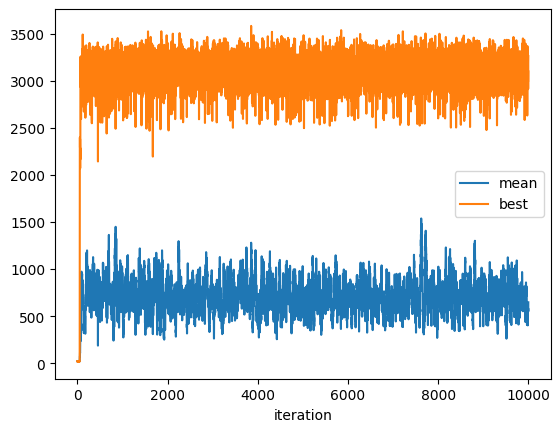

In [ ]:
fileId = '1vsR4jq3-IJBDzAI9zcEiFIqzYO3HIRXV'
fileUrl = f'https://drive.google.com/uc?export=download&confirm=t&id={fileId}'

df = pd.read_csv(fileUrl, header = None, names = ['iteration', 'mean','best'])
df.plot.line(x='iteration', y=['mean', 'best'])
# plt.savefig("graphic.svg")


# Pontuações, média e desvio padrão
Pontuações, média e desvio padrão obtidas por minha solução ótima e o baseline do professor.

In [ ]:
def runsDataFrame(myResult, profResult):
  my = ['Student'] + myResult + [np.mean(myResult), np.std(myResult)]
  prof = ['Teacher'] + profResult + [np.mean(profResult), np.std(profResult)]

  columns = ['Person'] + [f'Run {i + 1}' for i in range(len(myResult))] + ['mean_runs', 'std_runs']

  return pd.DataFrame(data = [my, prof], columns = columns)

myResult = [
  3741.0, 3669.0, 3479.0, 3143.0, 3442.0, 3383.5, 3606.25, 3123.75, 3529.25, 3369.5,
  3315.75, 3086.25, 3439.0, 3166.5, 2783.25, 3042.5, 3116.0, 2952.25, 3307.0, 3241.75,
  3515.5, 3560.75, 3468.75, 3220.0, 3588.75, 2760.75, 3311.0, 2781.75, 3210.5, 3362.0
]

profResult = [
  1214.0, 759.5, 1164.25, 977.25, 1201.0, 930.0, 1427.75, 799.5, 1006.25, 783.5,
  728.5, 419.25, 1389.5, 730.0, 1306.25, 675.5, 1359.5, 1000.25, 1284.5, 1350.0,
  751.0, 1418.75, 1276.5, 1645.75, 860.0, 745.5, 1426.25, 783.5, 1149.75, 1482.25
]

df = runsDataFrame(myResult, profResult)
df


,Person,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 23,Run 24,Run 25,Run 26,Run 27,Run 28,Run 29,Run 30,mean_runs,std_runs
0,Student,3741.0,3669.0,3479.00,3143.00,3442.0,3383.5,3606.25,3123.75,3529.25,...,3468.75,3220.00,3588.75,2760.75,3311.00,2781.75,3210.50,3362.00,3290.541667,256.430726
1,Teacher,1214.0,759.5,1164.25,977.25,1201.0,930.0,1427.75,799.50,1006.25,...,1276.50,1645.75,860.00,745.50,1426.25,783.50,1149.75,1482.25,1068.183333,304.035524


# Boxplot
Boxplot que compara o desempenho da solução ótima encontrada pelo PSO e o baseline do professor.

A esquerda se encontra a distribuição das pontuações obtidas pelo melhor dinossauro do PSO, enquanto a direita está a distribuição das pontuações do professor.

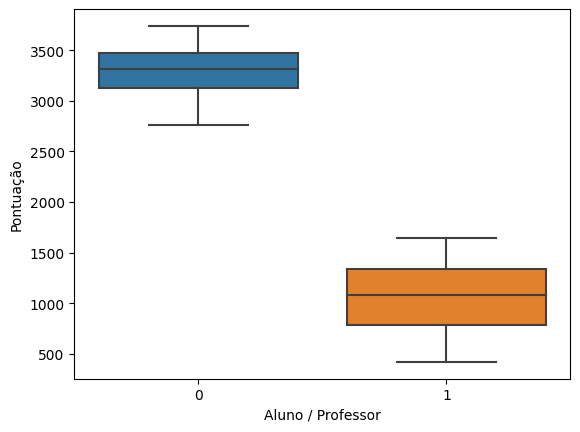

In [ ]:
def boxplotDinos(myResult, profResult):
  sns.boxplot(data = [myResult, profResult]).set(xlabel='Aluno / Professor', ylabel='Pontuação')
  # plt.savefig("boxplot.svg")
  plt.show()

boxplotDinos(myResult, profResult)


# Teste T Pareado e Teste de Wilcoxon
 Testes de hipótese aplicados aos resultados obtidos por mim e pelo professor.

In [ ]:
s, p = ttest_rel(myResult, profResult)
print(f'Teste T Pareado: {p}')

s, p = wilcoxon(myResult, profResult)
print(f'Teste de Wilcoxon: {p}')


Teste T Pareado: 4.3534484881102545e-25
Teste de Wlcoxon: 1.862645149230957e-09
